## Load Data

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
df = pd.read_excel('m5.xlsx',sheet_name= 4)

## Encoding

In [60]:
type(df)
df.head()

,State,SE State,Pop Under 18,Reported Victims
0,Alabama,Southeastern,1107108,9903
1,Alaska,Elsewhere,192428,7950
2,Arizona,Elsewhere,1476856,5114
3,Arkansas,Elsewhere,677522,7302
4,California,Elsewhere,9452391,132181


In [61]:
df = df.join(pd.get_dummies(df['SE State']))

In [62]:
df = df.drop(['SE State','State'],axis=1)
df.head()

,Pop Under 18,Reported Victims,Elsewhere,Southeastern
0,1107108,9903,0,1
1,192428,7950,1,0
2,1476856,5114,1,0
3,677522,7302,1,0
4,9452391,132181,1,0


In [63]:
df.isna().sum()

Pop Under 18        0
Reported Victims    0
Elsewhere           0
Southeastern        0
dtype: int64

In [64]:
df.describe()

,Pop Under 18,Reported Victims,Elsewhere,Southeastern
count,5.100000e+01,51.000000,51.000000,51.000000
mean,1.450870e+06,17741.803922,0.745098,0.254902
std,1.665660e+06,27003.216531,0.440143,0.440143
min,1.121280e+05,692.000000,0.000000,0.000000
25%,4.142820e+05,3982.000000,0.500000,0.000000
50%,9.791630e+05,8494.000000,1.000000,0.000000
75%,1.554108e+06,14782.000000,1.000000,0.500000
max,9.452391e+06,132181.000000,1.000000,1.000000


## Exploratory Data Analysis

In [65]:
df.corr()

,Pop Under 18,Reported Victims,Elsewhere,Southeastern
Pop Under 18,1.00000,0.855760,0.043870,-0.043870
Reported Victims,0.85576,1.000000,-0.088655,0.088655
Elsewhere,0.04387,-0.088655,1.000000,-1.000000
Southeastern,-0.04387,0.088655,-1.000000,1.000000


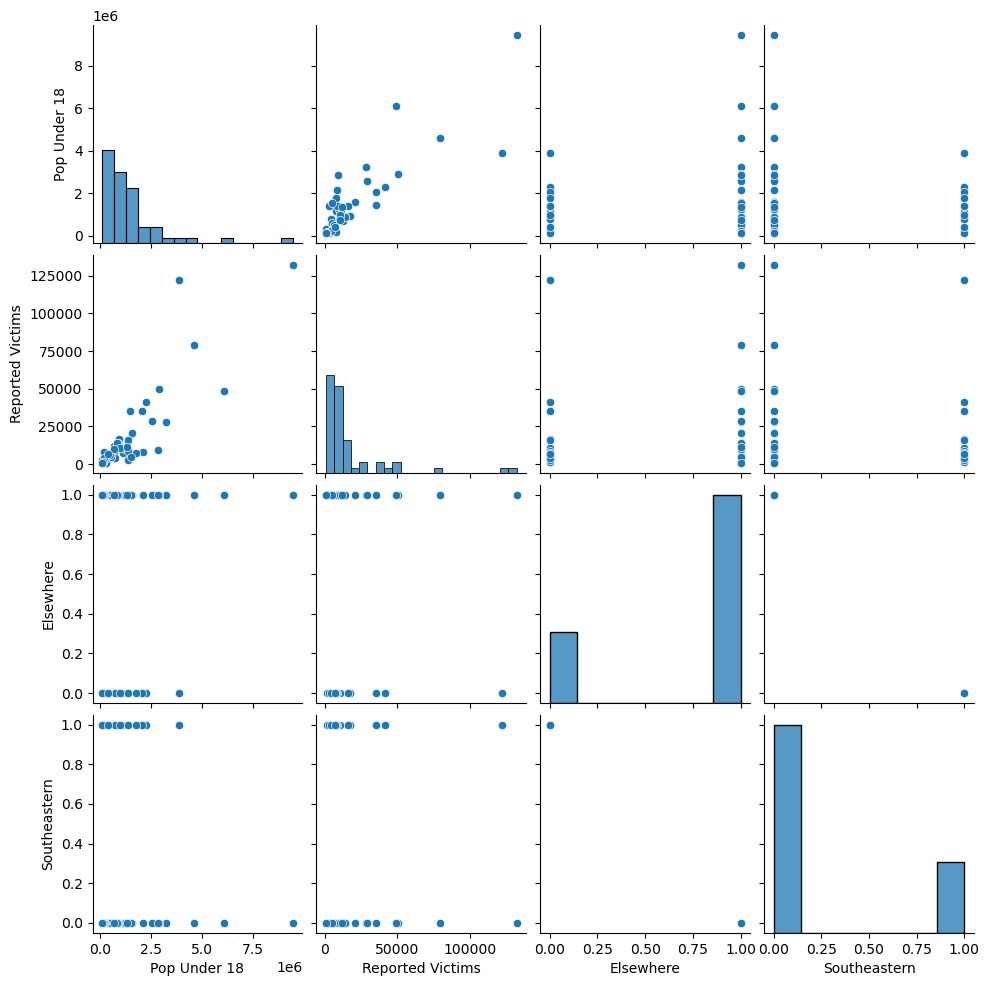

In [66]:
sns.pairplot(df)

## Split data

In [68]:
X = df.drop(['Reported Victims'],axis=1)
Y = df['Reported Victims']

In [69]:
X.head()

,Pop Under 18,Elsewhere,Southeastern
0,1107108,0,1
1,192428,1,0
2,1476856,1,0
3,677522,1,0
4,9452391,1,0


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## Modeling

In [71]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

#### Intercept and Beta coefficient

In [72]:
print(model.intercept_)
print(model.coef_)

-2488.903787088775
[ 1.78692158e-02 -4.27339791e+03  4.27339791e+03]


## Predictions

In [73]:
test_pred = model.predict(X_test)
test_pred

array([ 1.02281300e+05,  1.92813691e+04,  3.35811197e+04, -1.42847258e+02,
        1.53784465e+04,  2.18134804e+03,  1.84312412e+04,  7.56728761e+04,
        5.34448514e+03,  3.12525072e+04,  5.13934722e+04,  3.78813355e+03,
        1.71478527e+04,  8.83489694e+03,  2.02802548e+04,  1.62144513e+05])

## Evaluation

In [74]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [75]:
print("MAE: ",mean_absolute_error(test_pred,y_test))
print("MSE: ",mean_squared_error(test_pred,y_test))
print("RSME: ",np.sqrt(mean_absolute_error(test_pred,y_test)))
print("R_score: ",r2_score(test_pred,y_test))
print("model score: ",model.score(X_test,y_test))

MAE:  13413.528181846934
MSE:  377553511.8483085
RSME:  115.81678713315671
R_score:  0.7911252772248454
model score:  0.6767017013536177


## Checking for Assumptions

## Linearity of error

In [76]:
res = y_test - test_pred
res

43   -53473.299911
40    -8543.369094
46   -26010.119708
12     2089.847258
24   -11375.446451
31     4091.651964
17    -1486.241151
32     3376.123945
3      1957.514856
30   -23149.507216
13   -23233.472182
8      -756.133555
49    -5519.852700
6      3983.103061
47   -15607.254756
4    -29963.513101
Name: Reported Victims, dtype: float64

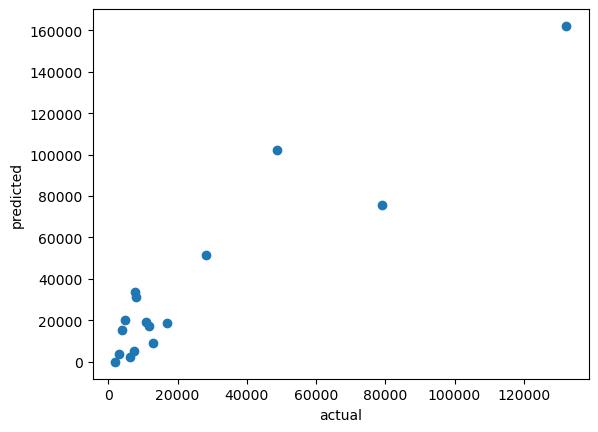

In [77]:
plt.scatter(y_test,test_pred)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

## Normality of error

<function matplotlib.pyplot.show(close=None, block=None)>

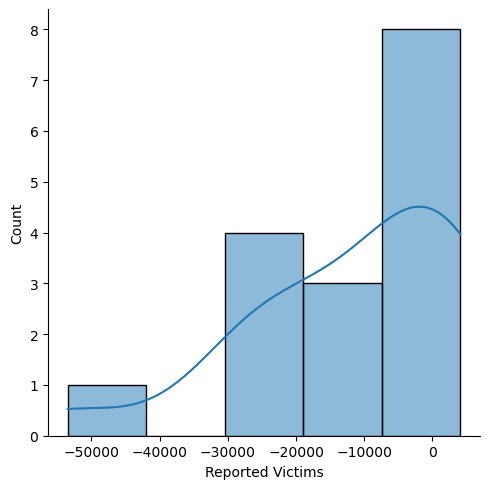

In [78]:
sns.displot(res,kde=True)
plt.show

## Equality of varience

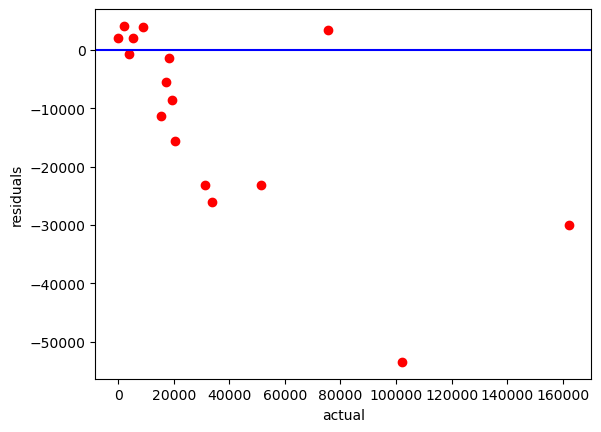

In [79]:
plt.scatter(test_pred,res,c='r')
plt.axhline(y=0,color='blue')
plt.xlabel('actual')
plt.ylabel('residuals')
plt.show()

## varibles significance

In [80]:
import statsmodels.api as smf

model2 = smf.OLS(Y,X)
results = model2.fit()
# Access the summary information
summary = results.summary()

# Print the summary
print(summary)

                            OLS Regression Results                            
Dep. Variable:       Reported Victims   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     71.34
Date:                Sun, 21 May 2023   Prob (F-statistic):           4.19e-15
Time:                        01:50:12   Log-Likelihood:                -557.07
No. Observations:                  51   AIC:                             1120.
Df Residuals:                      48   BIC:                             1126.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Pop Under 18     0.0140      0.001     11.882   